# World Happiness/Corruption

### Introduction

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents. 

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

In [6]:
happy = pd.read_csv("data/world_happiness.csv")
happy

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151
...,...,...,...,...,...,...,...,...
138,Rwanda,144.0,21.0,2.0,90.0,2110,69.1,4
139,Tanzania,131.0,78.0,34.0,49.0,2980,67.7,3
140,Afghanistan,151.0,155.0,136.0,137.0,1760,64.1,2
141,Central African Republic,155.0,133.0,122.0,113.0,794,52.9,1


Using a histogram, plot the distribution of the `happiness_score` variable.

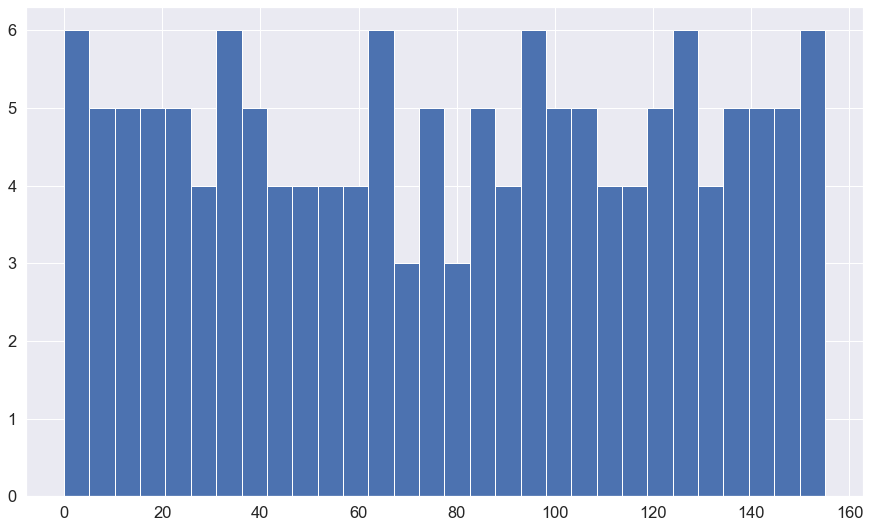

In [7]:
plt.hist(happy["happiness_score"], bins=30)
plt.show()

> The data looks distributed like a Uniform distribution.

Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?** 

In [8]:
happy.corr()

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
social_support,1.000000,0.470893,0.154848,0.449225,-0.687268,-0.705512,-0.824702
freedom,0.470893,1.000000,0.387234,0.493207,-0.444420,-0.388856,-0.567582
corruption,0.154848,0.387234,1.000000,0.305043,-0.335716,-0.135665,-0.215308
generosity,0.449225,0.493207,0.305043,1.000000,-0.531636,-0.433144,-0.499259
gdp_per_cap,-0.687268,-0.444420,-0.335716,-0.531636,1.000000,0.701955,0.727973
life_exp,-0.705512,-0.388856,-0.135665,-0.433144,0.701955,1.000000,0.780225
happiness_score,-0.824702,-0.567582,-0.215308,-0.499259,0.727973,0.780225,1.000000


> The corruption metric is the least correlated with the happiness score variable (remember that a correlation of -0.82 represents a strong inverse relation, weak correlations are represented by values close to zero in absolute terms).

<AxesSubplot:>

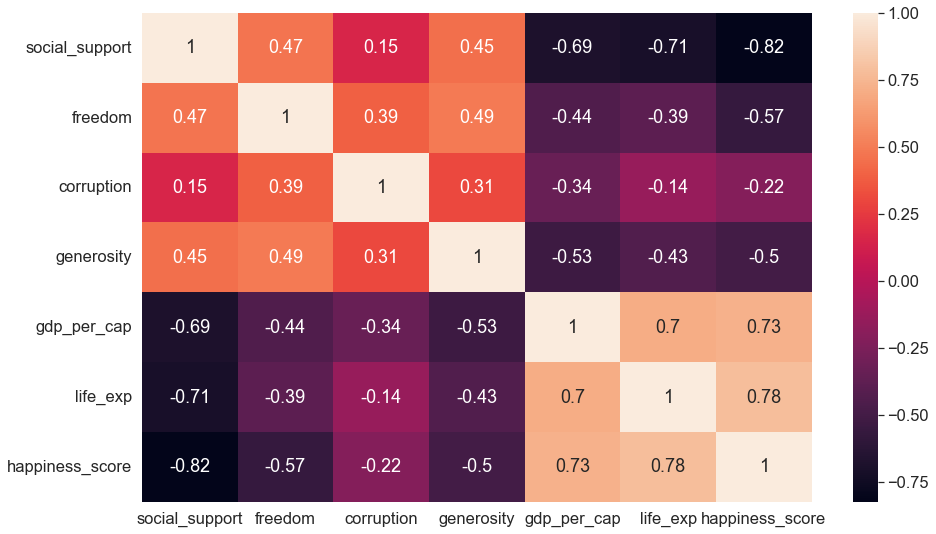

In [10]:
sns.heatmap(happy.corr(), annot=True)

7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

In [17]:
happy[happy["corruption"].isnull()]

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
20,United Arab Emirates,72.0,4.0,NaN,15.0,65700,73.6,135
26,Saudi Arabia,62.0,68.0,NaN,82.0,48100,77.1,128
27,Qatar,NaN,NaN,NaN,NaN,113000,80.5,127
35,Bahrain,59.0,24.0,NaN,23.0,42000,79.8,119
47,Kuwait,69.0,47.0,NaN,42.0,64100,83.3,105
78,Turkmenistan,8.0,83.0,NaN,33.0,17600,70.3,69
84,China,108.0,31.0,NaN,133.0,17100,77.5,63
91,Jordan,88.0,88.0,NaN,118.0,8350,79.6,55


In [18]:
for col in happy.columns:
    if col != "country":
        happy[col].fillna((happy[col].mean()), inplace=True)
    else:
        pass
        
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   143 non-null    float64
 2   freedom          143 non-null    float64
 3   corruption       143 non-null    float64
 4   generosity       143 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**. 

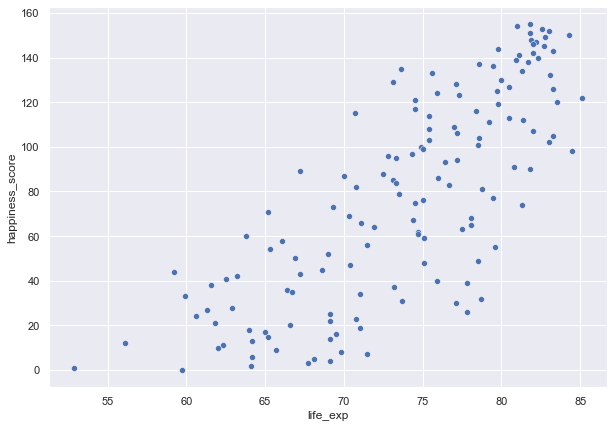

In [19]:
sns.set(rc={'figure.figsize':(10, 7)})
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)
plt.show()

In [20]:
import statsmodels.api as sm

Y = happy['happiness_score']
X = happy['life_exp']
X = sm.add_constant(data=X) 

model = sm.OLS(endog=Y,exog=X)
results = model.fit()

In [21]:
results_as_html = results.summary().tables[1].as_html()
results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

intercept, slope = results_df['coef'][0], results_df['coef'][1]
print('Intercept:', intercept)
print('Slope:', slope)

Intercept: -298.871
Slope: 5.1021


> Given the model above, an increase of 1-year in life expectancy corresponds to an increase of 5.1 points in the happiness score metric.

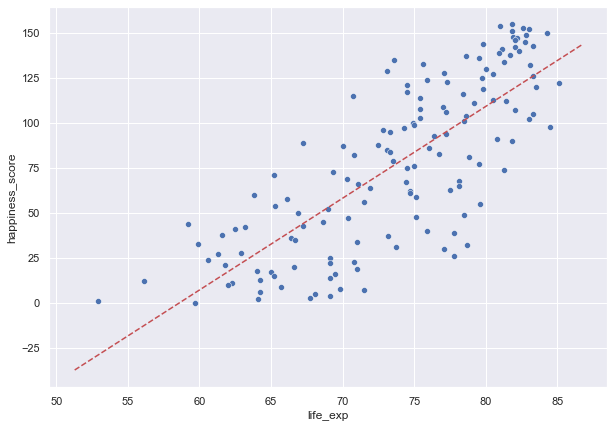

In [33]:
sns.set(rc={'figure.figsize':(10, 7)})
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + (slope * x_vals)   # eq of the regression line

plt.plot(x_vals, y_vals, '--', color='r')     # draw regression line on scatterplot
plt.show()

In [23]:
round(abs(results.predict(np.array([1, 1]))[0]) - abs(results.predict(np.array([1, 2]))[0]), 3)

5.102

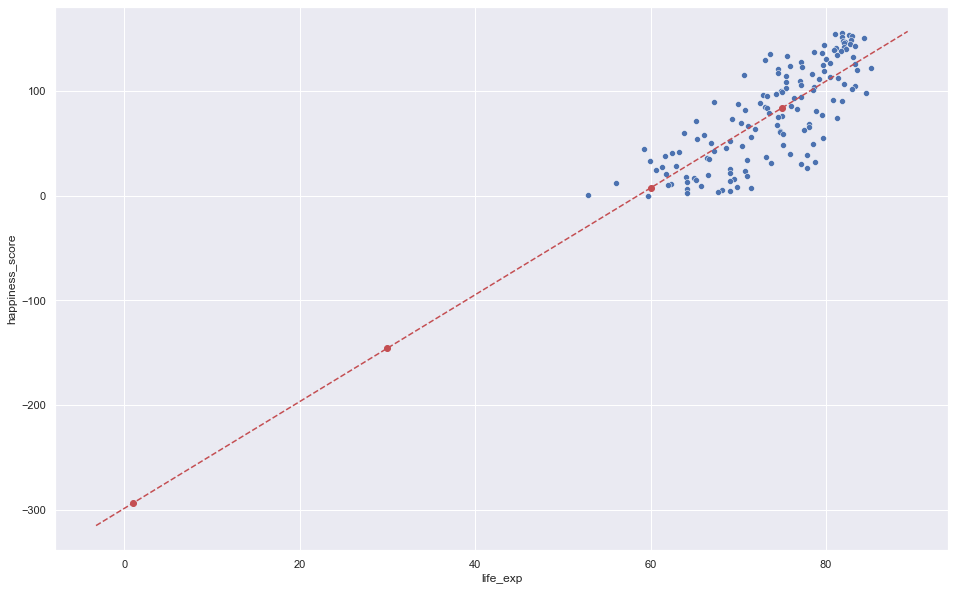

In [24]:
sns.set(rc={'figure.figsize':(16, 10)})
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)


# calculate some predictions
plt.plot(1, results.predict(np.array([1, 1]))[0], 'ro')
plt.plot(30, results.predict(np.array([1, 30]))[0], 'ro')
plt.plot(60, results.predict(np.array([1, 60]))[0], 'ro')
plt.plot(75, results.predict(np.array([1, 75]))[0], 'ro')

axes = plt.gca()

x_vals = np.array(axes.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, '--', color='r')
plt.show()

9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer. 

In [25]:
happy.corr()['happiness_score'].sort_values(ascending=False)[['happiness_score','social_support', 'freedom', 'generosity', 'life_exp']]

happiness_score    1.000000
social_support    -0.821384
freedom           -0.565298
generosity        -0.497250
life_exp           0.780225
Name: happiness_score, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
y = happy['happiness_score']
X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.10
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           3.39e-29
Time:                        08:04:51   Log-Likelihood:                -426.46
No. Observations:                  95   AIC:                             862.9
Df Residuals:                      90   BIC:                             875.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3763     38.767      0.036      0.972     -75.642      78.395
social_support    -0.5119      0.073     -7.025      0.000      -0.657      -0.367
freedom           -0.1786      0.060     -2.966      0.004      -0.298      -0.059
generosity        -0.0518      0.061     -0.847      0.399      -0.173       0.070
life_exp           1.8109      0.459      3.942      0.000       0.898       2.724
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.523
Skew:                          -0.042   Prob(JB):                        0.770
Kurtosis:                       3.354   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
model_test = sm.OLS(y_test,X_test)
results_test = model_test.fit()
results_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     50.64
Date:                Sun, 21 Aug 2022   Prob (F-statistic):           1.01e-15
Time:                        08:04:51   Log-Likelihood:                -209.39
No. Observations:                  48   AIC:                             428.8
Df Residuals:                      43   BIC:                             438.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -145.6747     49.345     -2.952      0.005    -245.188     -46.161
social_support    -0.3854      0.102     -3.791      0.000      -0.590      -0.180
freedom           -0.2358      0.080     -2.933      0.005      -0.398      -0.074
generosity        -0.0066      0.082     -0.080      0.936      -0.172       0.159
life_exp           3.6813      0.589      6.251      0.000       2.494       4.869
==============================================================================
Omnibus:                        2.477   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.815
Skew:                          -0.292   Prob(JB):                        0.404
Kurtosis:                       2.248   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**If the performance of the model on the training dataset is significantly better than the performance on the test dataset, then the model may have overfit the training dataset.**

**Overfitting is a common cause for poor generalization if we have a decisively high R-squared value of the model
In our case, R-squared value of training set is good, so the model doesn't overfitting the training data.**

10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfyied with the model's performance?

In [29]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [30]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(y_test))) #naive mae
print('Testing MAE:', mae(y_test, pred_test)) # mae

Naïve Testing MAE: 39.94
Testing MAE: 17.54


> The model's performance could definitely be improved, I wouldn't trust the model to give accurate results since its Mean Absolute Percentage Error is almost 40%. Given the issues of multicollinearity I would probably want to try a different model that doesn't suffer from this problem or I'd try to work on the features, maybe searching for different and more predictive regressors. 